In [2]:
import Pkg; Pkg.activate("../.")

using Revise
using DeconvMultiStep
using CairoMakie

  Activating project at `~/Desktop/En cours !/Simon/DeconvMultiStep/DeconvMultiStep.jl`


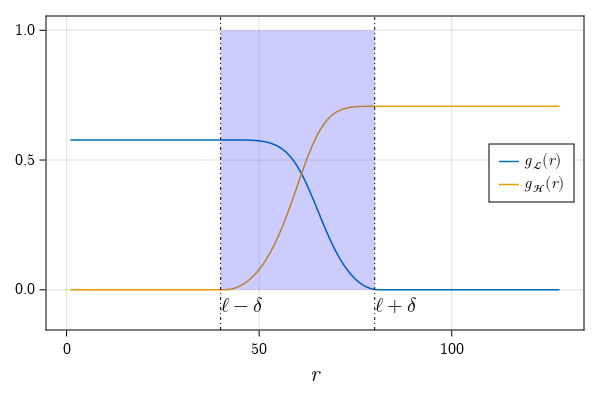

In [3]:
n_pix = 128
ℓ = 60.0
δ = 20.0

σ²=2.0
η²=3.0

g = filt_rad.(0:n_pix-1, ℓ, δ;σ²=σ², η²=η²)
gl = [tup[1] for tup in g]
gh = [tup[2] for tup in g]

fig = Figure(resolution = (600, 400), font = "CMU Serif")
ax = Axis(fig[1, 1],  xlabel = (L"r"), xlabelsize = 22)
lines!(ax, gl, label = L"g_\mathcal{L}(r)")
lines!(ax, gh, label = L"g_\mathcal{H}(r)")
#lines!(ax, σ²*gh.^2+η²*gl.^2, label = L"\sigma^2 g_\mathcal{L}(r)^2 + \eta^2 g_\mathcal{H}(r)^2")

vlines!(ax, [ℓ+δ]; color = :black, linewidth = 1, linestyle = :dashdot)
vlines!(ax, [ℓ-δ]; color = :black, linewidth = 1, linestyle = :dashdot, xticks = ([ℓ+δ], ["p"]))
text!(ax, L"\ell + \delta", position = (ℓ+δ, -0.1))
text!(ax, L"\ell - \delta", position = (ℓ-δ , -0.1))

band!([ℓ-δ, ℓ+δ], [0, 0], [1, 1]; color = (:blue, 0.2))

axislegend(position = :rc)
fig

# save("../../paper/figs/filts.png", fig, px_per_unit = 4)

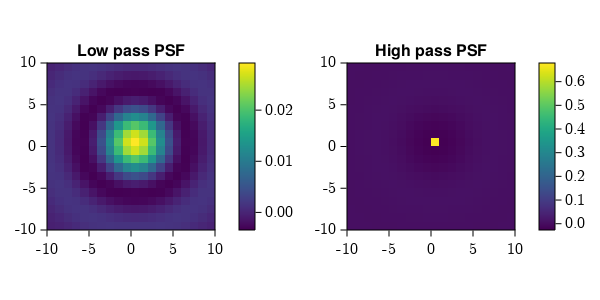

In [5]:
n_pix = 512
ℓ = 60.0
δ = 20.0

filter = make_filters(ℓ, δ, n_pix; σ²=σ², η²=η²)


nx, ny  =size(filter.LowPass)
lx, ly = LinRange(-nx/2, nx/2, nx), LinRange(-ny/2, ny/2, ny)

fig = Figure(resolution = (600, 300), font = "CMU Serif")

ax1 = Axis(fig[1, 1], aspect=DataAspect(); title="Low pass PSF") 
ax2 = Axis(fig[1, 3], aspect=DataAspect(); title="High pass PSF") 
hm1 = heatmap!(ax1, lx, ly, filter.LowPass)
hm2 = heatmap!(ax2, lx, ly, filter.HighPass)

zoom = 10
xlims!(ax1, -zoom, zoom)
ylims!(ax1, -zoom, zoom)
xlims!(ax2, -zoom, zoom)
ylims!(ax2, -zoom, zoom)

Colorbar(fig[1, 2], hm1)
Colorbar(fig[1, 4], hm2)
rowsize!(fig.layout, 1, Aspect(1, 1))

fig